#### albu 어그멘테이션 test 
##### 요약
뒤집기와 회전은 좋아보인다.  
색상같은 경우는.. 보통 박스는 노란색, 보통 종량제 봉투는 분홍색, 이렇게 좀 일반적인 색상이 정해져있음. 색을 많이 바꾸는게 좋을지는 의문.  
밝기 같은 경우.. 사진들이 대부분 밝은 대낮에 자연광이다. 밤에 가로등 밑에도 좀 있긴 한데 이건 노랗다. 그럼 노란색으로 바꾸는거 정도? 밝기는 안건드는게 나을지도  
<br><br>
색 : rgb셔플 (많지 않게. 일반적인 색이 있으니까, 플라스틱이나 일반쓰레기 같이 다채로운 색 좀 더 넣을 수 있도록. 0.2 정도면 되지 않을까)  
밝기 : X  
노이즈 : X  
블러 : (가우시안 블러, 무브 블러)  
뒤집기 : O  (0.5 확률)
돌리기 : (0, 90, -90, 180) 1/4 확률  
돌리기 : (-10~10) (구석에 bbox 가 잘 없어서 약한 회전 정도는 ㄱㅊ을듯 5도? 10도? 이것도 자주 주지는 말자)


In [1]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt

def albu_ex(transform, name) : 
    # 이미지 로드
    image = cv2.imread('image.jpg')

    # 이미지 증강
    transformed_image = transform(image=image)['image']

    # 이미지 출력
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
    ax[1].set_title(name)
    ax[1].axis('off')

    plt.show()


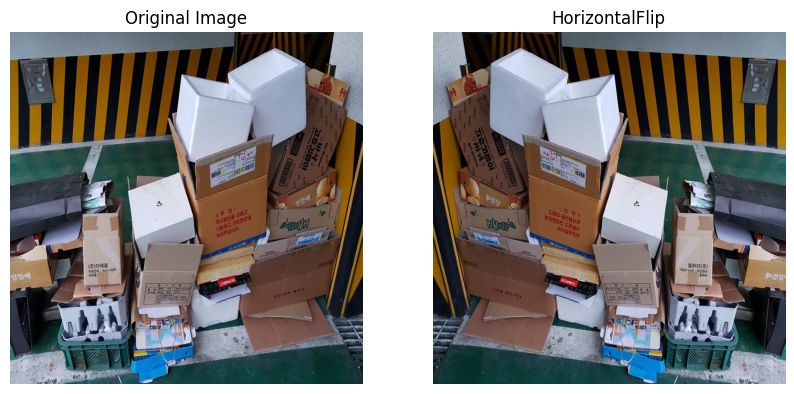

In [2]:
# 변환 함수 생성
transform = A.Compose([
    A.HorizontalFlip(p=1),   # 50% 확률로 이미지를 좌우로 뒤집기
])
albu_ex(transform, 'HorizontalFlip')

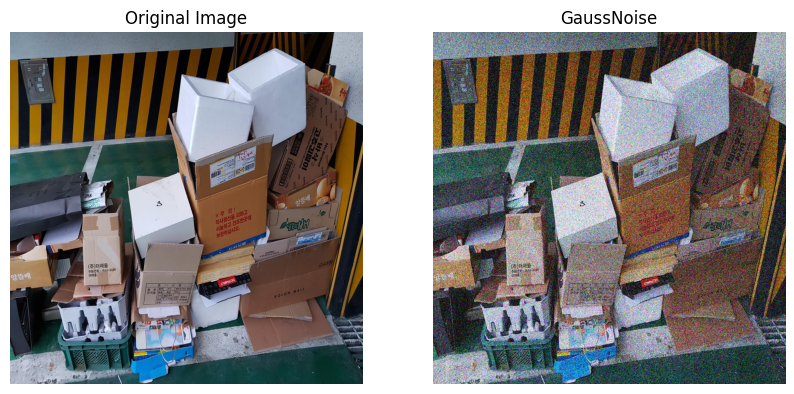

In [11]:
# 변환 함수 생성
# var_limit 4000 정도는 줘야 티가님
transform = A.Compose([
    A.GaussNoise(var_limit=(3900,4000.0), mean=0, per_channel=True, p=1.0)
])
albu_ex(transform, 'GaussNoise')

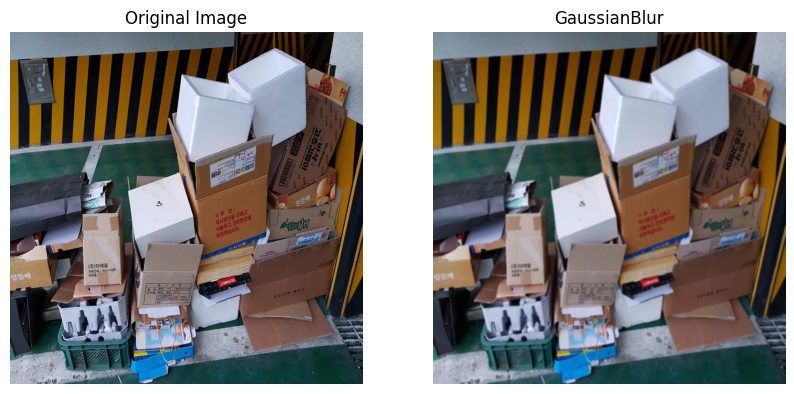

In [230]:
# 변환 함수 생성
# blur_limit (25,25) 가 요정도. 너무 크면 안됨
transform = A.Compose([
    A.GaussianBlur(blur_limit=(5,11), p=1.0)
])
albu_ex(transform, 'GaussianBlur')

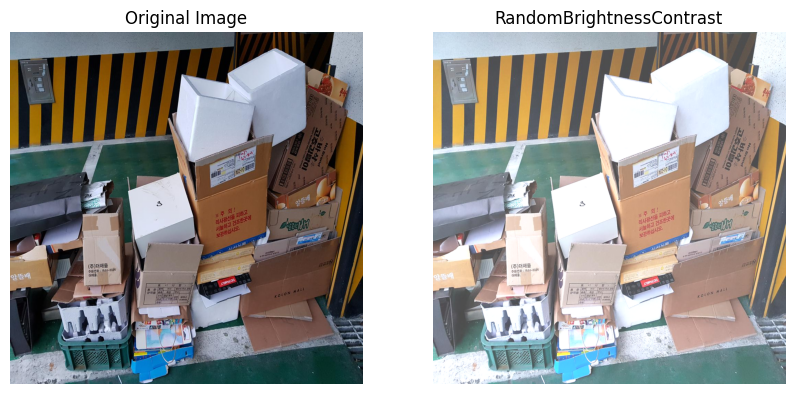

In [46]:
# 변환 함수 생성
# brightness_limit 1 이 완전 흰색, -1 이 완전 검은색. 낮 -> 밤 : -0.3 정도..
transform = A.Compose([
    A.RandomBrightnessContrast(brightness_limit = (0.3,0.3), contrast_limit = (0,0), brightness_by_max = True, p=1)
])

albu_ex(transform, 'RandomBrightnessContrast')

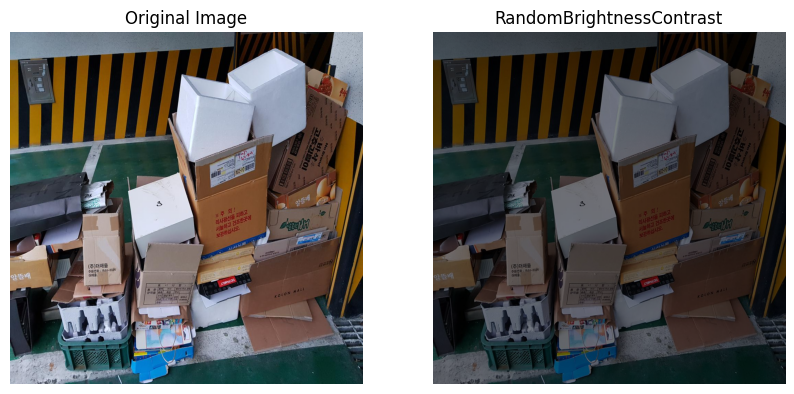

In [48]:
# 변환 함수 생성
# contrast_limit 이게 좀 더 자연스러운 어두움인듯 낮->밤 : -0.5 # 이것만 넣어봐도 ㄱㅊ을듯
# 근데 사진 대부분이 낮에 촬영한거란 말이지.. 밝기 조절은 굳이?
transform = A.Compose([
    A.RandomBrightnessContrast(brightness_limit = (0.,0.), contrast_limit = (-0.5,-0.5), brightness_by_max = True, p=1)
])

albu_ex(transform, 'RandomBrightnessContrast')

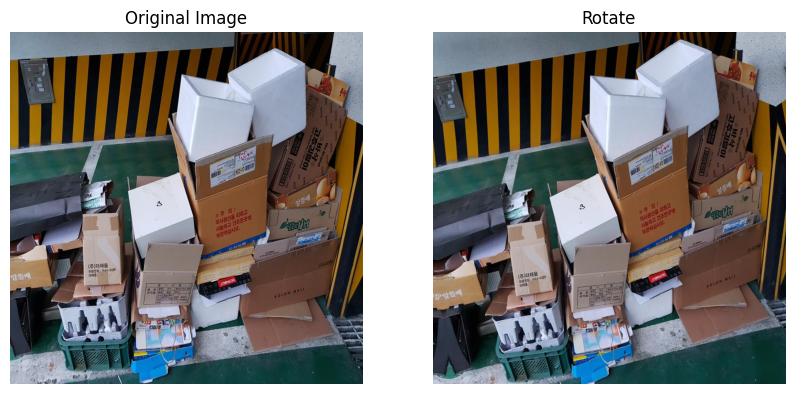

In [2]:
# 꺾으면서 사라지는 부분은 이미지 대칭해서 채워넣는듯
transform = A.Compose([
    A.Rotate(limit=(-10,10), p=1)
])

albu_ex(transform, 'Rotate')

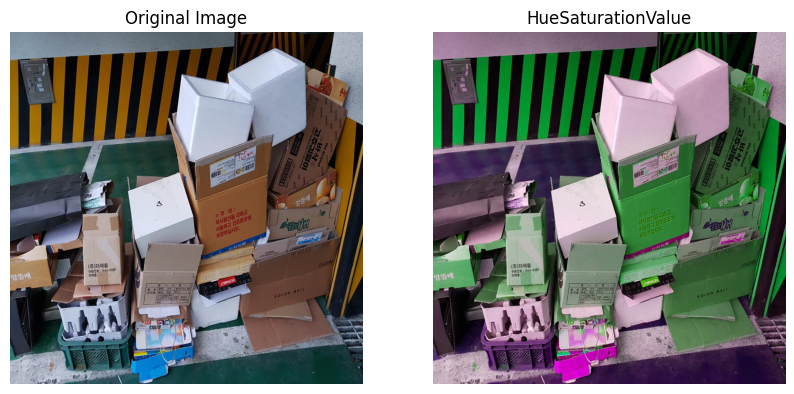

In [70]:
transform = A.Compose([
    A.HueSaturationValue(
        hue_shift_limit = (-50,-50), # 모르겠다...
        sat_shift_limit=0,
        val_shift_limit=0,
        p=1)
])

albu_ex(transform, 'HueSaturationValue')

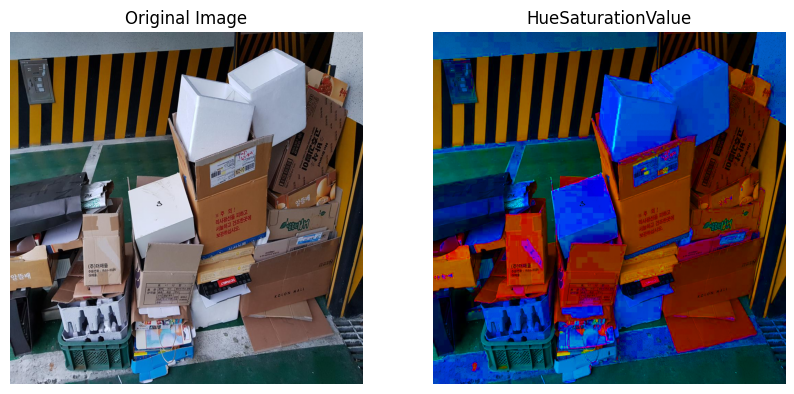

In [73]:
transform = A.Compose([
    A.HueSaturationValue(
        hue_shift_limit = 0,
        sat_shift_limit=(1000,1000), # ..?
        val_shift_limit=0,
        p=1)
])

albu_ex(transform, 'HueSaturationValue')

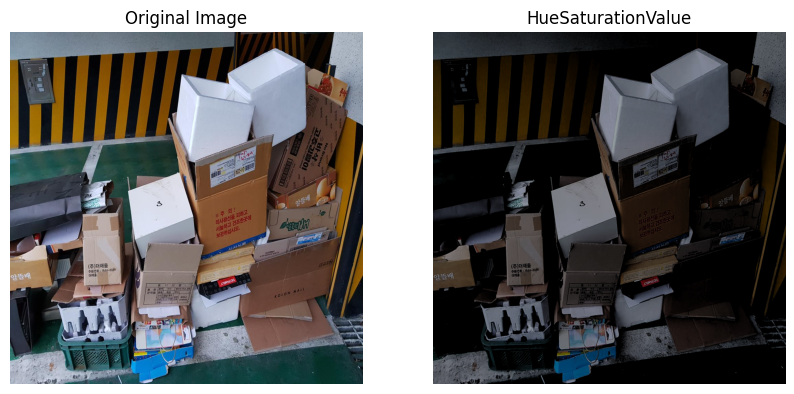

In [76]:
transform = A.Compose([
    A.HueSaturationValue(
        hue_shift_limit = 0,
        sat_shift_limit=0,
        val_shift_limit=(-100,-100), # 밝기
        p=1)
])

albu_ex(transform, 'HueSaturationValue')

/opt/conda/envs/detection/lib/python3.7/site-packages/albumentations/augmentations/transforms.py:318: FutureWarning: JpegCompression has been deprecated. Please use ImageCompression
  FutureWarning,


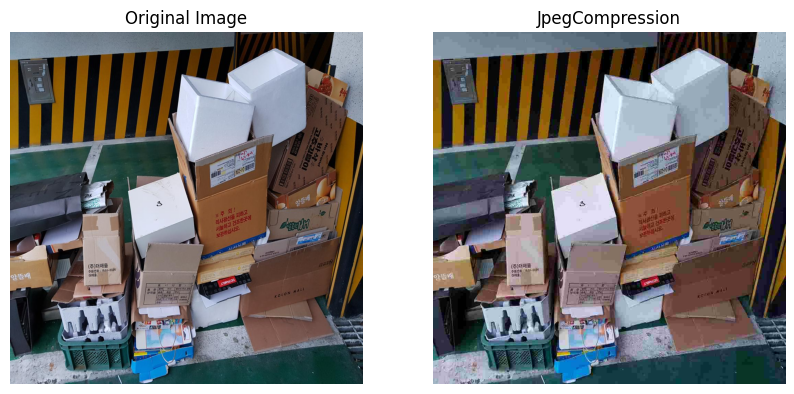

In [85]:
transform = A.Compose([
    A.JpegCompression(
        quality_lower=10, quality_upper=10, p=1)
])

albu_ex(transform, 'JpegCompression')

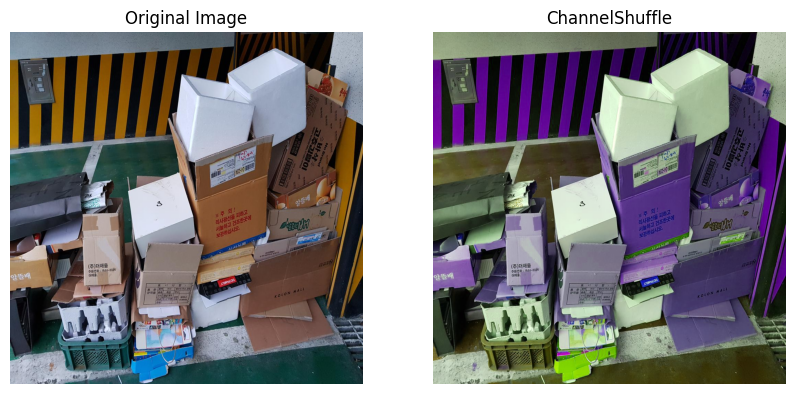

In [128]:
transform = A.Compose([
    A.ChannelShuffle(
        p=1)
])
albu_ex(transform, 'ChannelShuffle') # rgb 셔플 -> 6가지

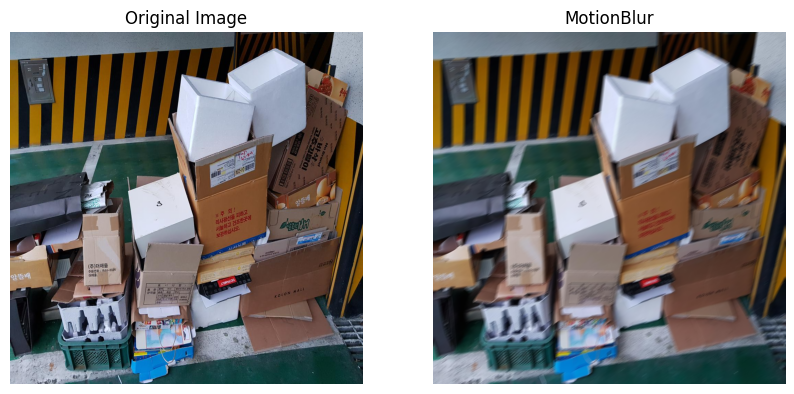

In [220]:
transform = A.Compose([
    A.MotionBlur(
        allow_shifted = False,
        blur_limit = 25,
        p=1)
])
albu_ex(transform, 'MotionBlur')

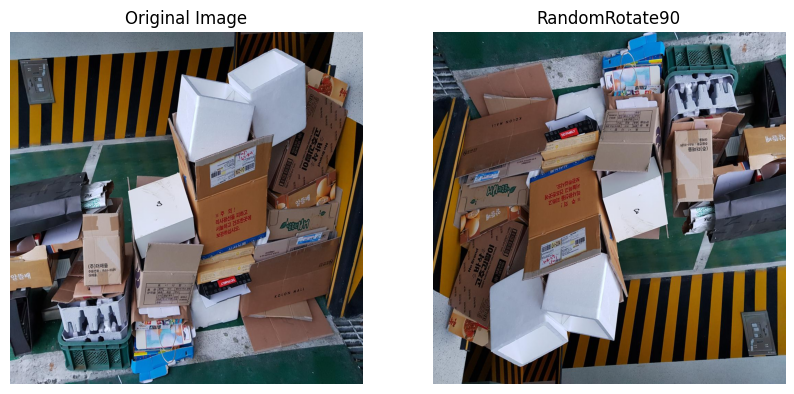

In [3]:
transform = A.Compose([
    A.RandomRotate90(
        p=1)
])
albu_ex(transform, 'RandomRotate90')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


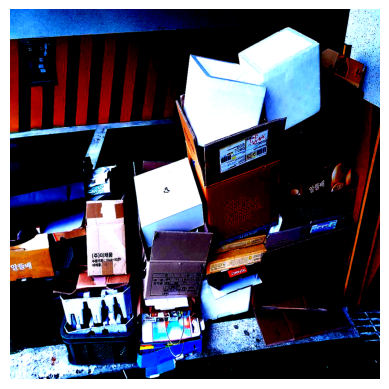

In [232]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 이미지 로드
image = cv2.imread('image.jpg')

img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)

# 이미지 정규화
mean = img_norm_cfg['mean']
std = img_norm_cfg['std']
to_rgb = img_norm_cfg['to_rgb']

if to_rgb:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = (image - np.array(mean)) / np.array(std)

# 이미지 출력
plt.imshow(image)
plt.axis('off')
plt.show()